# Imports

In [20]:
import importlib
import SYT
import matplotlib.pyplot as plt
import os

importlib.reload(SYT)

<module 'SYT' from 'c:\\Users\\manis\\Documents\\UW\\UWClasses\\Sophmore\\FourthQuarter\\Math480\\Assignments\\Math-480\\6_20_2024_SYT\\SYT.py'>

## SYT Helper Functions.
Implement the functions `is_valid_SYT` and `reshape_perm` then run this cell to test your helper functions. 

In [14]:
print(SYT.is_valid_SYT(((1, 2, 3), (4, 5, 6), (7, 8, 9)))) # True
print(SYT.is_valid_SYT(((1, 2, 3), (5, 4), (6,)))) # False

print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 2, 1))) # ((1, 2, 3), (4, 5), (6,))
print(SYT.reshape_perm((1, 2, 3, 4, 5, 6), (3, 3))) # ((1, 2, 3), (4, 5, 6))

True
False
((1, 2, 3), (4, 5), (6,))
((1, 2, 3), (4, 5, 6))


# Generate all SYTs
Implement `SYTs` and generate all valid SYTs for the following shapes:
- (4,3,2,1)
- (2,2)
- (3,3)
- (4,4)
- (5,5)

Save your SYTs in the `data` subfolder. For example, the SYTs of shape (4,3,2,1) are saved in `data/SYTs_4_3_2_1.txt`.

What do you notice about SYTs of shape (n,n)? Write your observation in this cell here:


In [16]:
# Generate SYTs
# Save each SYT in a file, such that the name corresponds to the shape of the SYT: Ex: shape of (3, 2) -> file name: "SYTs_3_2.txt"
# Use the function SYTs(shape) to generate the SYTs
shapes = [(4,3,2,1), (2,2), (3,3), (4,4), (5,5)]
dirname = os.path.dirname("./")
for shape in shapes:
    #SYTs = SYT.SYTs(shape)
    S = SYT.SYTs(shape)
    filename = os.path.join(dirname, "data/SYTs_" + "_".join(map(str, shape)) + ".txt")
    with open(filename, "w") as f:
        for s in S:
            f.write(str(s) + "\n")

# What do you notice about SYTs of shape (n,n)?
# I believe that for SYTs of shape (n,n), the number of SYTs is equal to the nth Catalan number.


# Generating Random SYTs
Implement `random_SYT` and `random_SYT_2` and compare the efficacy on the shape (2,2,2).

Print out how long it takes to generate 10000 samples using each function and compare the distributions to the uniform distribution.

Plot the distributions using matplotlib and save them in the `figures` subfolder.

3.5682973861694336
0.1733095645904541


C:\Users\manis\AppData\Local\Temp\ipykernel_30796\3664737182.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xAxis1, rotation=45)
C:\Users\manis\AppData\Local\Temp\ipykernel_30796\3664737182.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xAxis2, rotation=45)


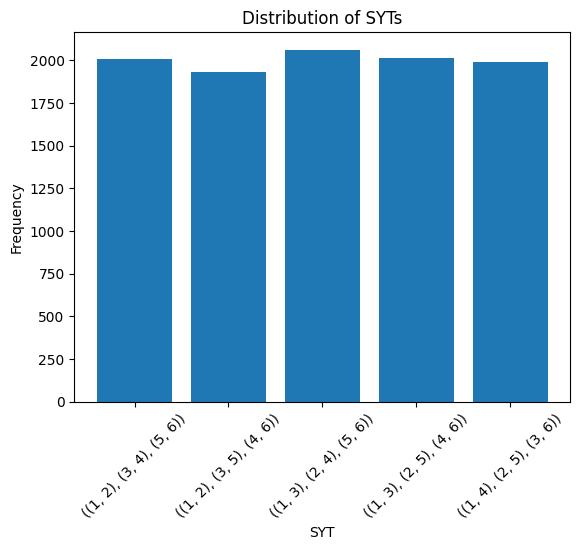

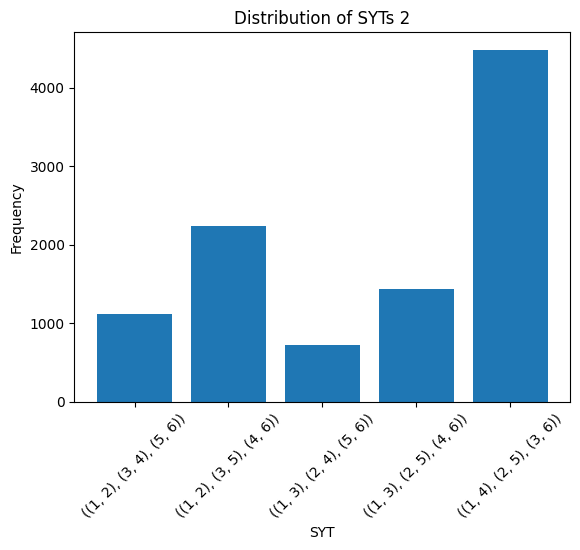

In [35]:
import time

shape = (2,2,2)

distribution = {syt: 0 for syt in SYT.SYTs(shape)}
start = time.time()
for i in range(10000):
  # Test random_SYT()
  distribution[SYT.random_SYT(shape)] += 1
print(time.time() - start)

distribution2 = {syt: 0 for syt in SYT.SYTs(shape)}
start = time.time()
for i in range(10000):
  # Test random_SYT_2()
  distribution2[SYT.random_SYT_2(shape)] += 1
print(time.time() - start)

xAxis1 = []
for syt in distribution:
    xAxis1.append(str(syt))
fig, ax = plt.subplots()
ax.bar(xAxis1, distribution.values())
ax.set_xlabel('SYT')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of SYTs')
ax.set_xticklabels(xAxis1, rotation=45)
fig.savefig("figures/random_SYT_dist.png")

xAxis2 = []
for syt in distribution2:
    xAxis2.append(str(syt))
fig2, ax2 = plt.subplots()
ax2.bar(xAxis2, distribution2.values())
ax2.set_xlabel('SYT')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of SYTs 2')
ax2.set_xticklabels(xAxis2, rotation=45)
fig2.savefig("figures/random_SYT_2_dist.png")

# Compared to the normal distribution, the second is much faster. However, the first distribution is more 
# uniform than the second distribution.